In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import xlsxwriter

os.chdir(r"C:\Users\User\Downloads")
from sklearn.linear_model import LinearRegression

x1=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Ирц')

y1=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Шалгалт')


x = np.array(x1["Нийт -10"]).reshape((-1, 1))
y = np.array(y1["Нийт"])

#niit = niit[:28]
niit=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Нийт', usecols = "a,C:l",index_col=0)
niit.rename(columns = {'Unnamed: 11':'Үнэлгээ'},inplace = True)
niit2=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Нийт', usecols = "m:n")

In [2]:
reg = LinearRegression().fit(x, y)

In [3]:
r_sq = reg.score(x, y)
print(r_sq)

0.7505230247299526


In [4]:
print('intercept:', reg.intercept_)

intercept: -20.73779773986011


In [5]:
y_pred = reg.predict(x)
y_pred = reg.intercept_ + reg.coef_ * x
y_pred = pd.DataFrame(y_pred, columns = ['Таамагласан'],index=range(1,29))
niit['Таамагласан шалгалт оноо-Ирц'] = y_pred
niit3=niit

In [6]:
x = np.array(x1["Нийт -10"])
y = np.array(y1["Нийт"])
r = np.corrcoef(x, y)
#Pearson's r
r

array([[1.        , 0.86632732],
       [0.86632732, 1.        ]])

In [8]:
import scipy.stats


In [9]:
scipy.stats.pearsonr(x, y)

(0.8663273196257593, 2.564312597884635e-09)

In [10]:
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.7210004067084596, pvalue=1.5030515920419449e-05)

In [11]:
scipy.stats.kendalltau(x, y)

KendalltauResult(correlation=0.5649603749658926, pvalue=5.178988267504104e-05)

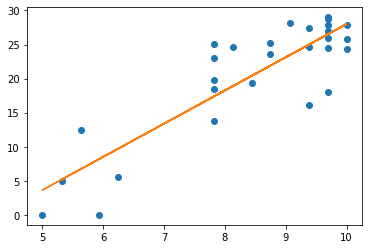

In [12]:
import matplotlib.pyplot as plt
plt.plot(x, y,'o')
b1, b0 = np.polyfit(x, y, 1)
plt.plot(x, b1*x + b0)

In [13]:
medeelel=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Оюутнуудын нэмэлт мэдээлэл', usecols = "a,C:h",index_col=0)
kod = pd.read_excel("Бие даалт - 2.xlsx", sheet_name='Нийт',usecols = "C")
kod["Оюутны код"] = kod["Оюутны код"].str[:-6]
kod["Оюутны код"] = kod["Оюутны код"].str[-2:]
kod = kod[:-1]
kod=kod.to_numpy().astype(int)
kod=22-kod
kurs=pd.DataFrame(kod, columns = ['Суралцаж буй курс'],index=range(1,29))
medeelel1 = pd.concat([medeelel, kurs], axis = 1)
medeelel1


,Оюутны код,Оюутны нэр,Голч дүн,Судалсан хичээлийн тоо,ЭЕШ оноо,Суралцаж буй мэргэжил,Суралцаж буй курс
1,K17FF1275,Батмөнх.Д,1.94,34,662,НББ,5
2,K19FF1276,Оюунчимэг.Д,3.82,20,640,ЭЗО,3
3,K16FF1277,Гантуяа.Б,2.73,38,650,НББ,6
4,K16FF1278,Энхжаргал.Д,2.61,37,707,СУ,6
5,K19FF1279,Нарантунгалаг.Ц,3.14,21,657,АЯЛАЛ ЖУУЛЧЛАЛ,3
6,K17FF1280,Цэндхорлоо.П,3.37,36,684,БАНК,5
7,K16FF1281,Даваацэцэг.М,2.88,38,701,МСМ,6
8,K17FF1282,Батцэцэг.Л,3.44,37,687,ЭЗО,5
9,K18FF1283,Адъяатамир.Т,3.81,29,735,НББ,4
10,K18FF1284,Гүнгэрмаа.Н,3.85,30,797,СУ,4


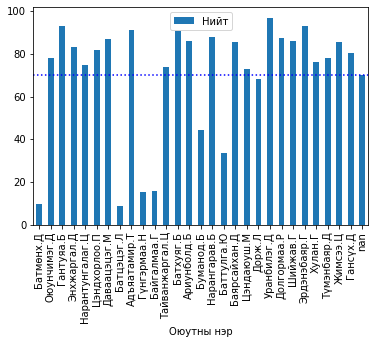

In [14]:
x=niit['Оюутны нэр']
y=niit['Нийт']
niit.plot.bar(x='Оюутны нэр', y='Нийт')
a=np.mean(niit['Нийт'])
plt.axhline(y=a, color='b', linestyle=':', label='red line')

In [17]:
too=niit2['Unnamed: 12']
unelgee=niit2['Unnamed: 13']
too= toogoor[:5]
unelgee= usgeer[:5]
fig = plt.figure(figsize =(8, 8))
plt.pie(too, labels = unelgee,autopct='%1.1f%%',shadow=True, radius=1)
plt.legend(toogoor, loc = 'best')

NameError: name 'toogoor' is not defined

,Суралцаж буй оюутны тоо
Суралцаж буй мэргэжил,
СУ,4
НББ,4
АЯЛАЛ ЖУУЛЧЛАЛ,3
МКТ,3
ЭЗО,3
БУ,3
ЭРХ ЗҮЙ,3
БАНК,3
МСМ,2


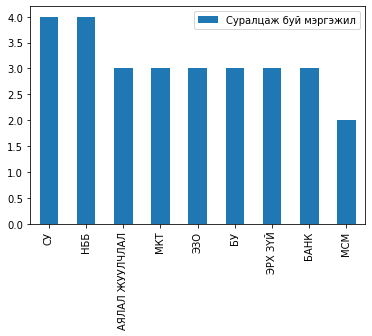

In [18]:
mergejil = pd.DataFrame(medeelel1['Суралцаж буй мэргэжил'].value_counts())                
mergejil.plot.bar(x=None, y='Суралцаж буй мэргэжил')
a = mergejil['Суралцаж буй мэргэжил']
mergejil.rename(columns = {'Суралцаж буй мэргэжил':'Суралцаж буй оюутны тоо'},inplace = True)
mergejil.index.name= 'Суралцаж буй мэргэжил'
mergejil

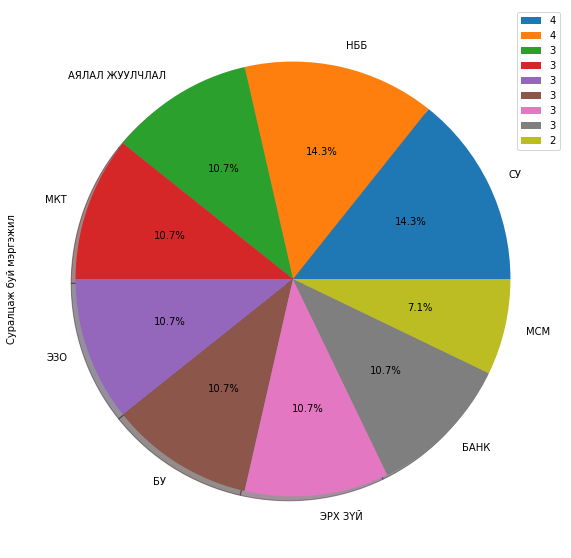

In [19]:
value_counts = medeelel1['Суралцаж буй мэргэжил'].value_counts(dropna=True, sort=True)
fig = plt.figure(figsize =(10, 10))
value_counts.plot(kind='pie',autopct='%1.1f%%',shadow=True, radius=1)
plt.savefig('Pie1.png',bbox_inches='tight',pad_inches=2)
plt.legend(a, loc = 'best')
plt.show()

In [20]:
x2=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Оюутнуудын нэмэлт мэдээлэл')

y2=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Оюутнуудын нэмэлт мэдээлэл')
x3 = np.array(x2["Судалсан хичээлийн тоо"]).reshape((-1, 1))
y3 = np.array(y2["Голч дүн"])

reg2 = LinearRegression().fit(x3, y3)
r_sq2 = reg2.score(x3, y3)
print(r_sq2)

0.01701498414096292


In [21]:
print(reg2.intercept_)
print(reg2.coef_)

2.831738591497567
[0.00865669]


In [22]:
y2_pred = reg2.predict(x3)
y2_pred = reg2.intercept_ + reg2.coef_ * x3
y2_pred = pd.DataFrame(y2_pred, columns = ['Таамагласан'],index=range(1,29))
medeelel1['Таамагласан голч-СХТ'] = y2_pred
medeelel1.index.name= 'No'
medeelel1

,Оюутны код,Оюутны нэр,Голч дүн,Судалсан хичээлийн тоо,ЭЕШ оноо,Суралцаж буй мэргэжил,Суралцаж буй курс,Таамагласан голч-СХТ
No,,,,,,,,
1,K17FF1275,Батмөнх.Д,1.94,34,662,НББ,5,3.126066
2,K19FF1276,Оюунчимэг.Д,3.82,20,640,ЭЗО,3,3.004872
3,K16FF1277,Гантуяа.Б,2.73,38,650,НББ,6,3.160693
4,K16FF1278,Энхжаргал.Д,2.61,37,707,СУ,6,3.152036
5,K19FF1279,Нарантунгалаг.Ц,3.14,21,657,АЯЛАЛ ЖУУЛЧЛАЛ,3,3.013529
6,K17FF1280,Цэндхорлоо.П,3.37,36,684,БАНК,5,3.143379
7,K16FF1281,Даваацэцэг.М,2.88,38,701,МСМ,6,3.160693
8,K17FF1282,Батцэцэг.Л,3.44,37,687,ЭЗО,5,3.152036
9,K18FF1283,Адъяатамир.Т,3.81,29,735,НББ,4,3.082783


In [23]:
x2=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Оюутнуудын нэмэлт мэдээлэл')

y2=pd.read_excel('Бие Даалт - 2.xlsx', sheet_name='Оюутнуудын нэмэлт мэдээлэл')
x4 = np.array(x2["ЭЕШ оноо"]).reshape((-1, 1))
y4 = np.array(y2["Голч дүн"])

reg3 = LinearRegression().fit(x4, y4)
r_sq3 = reg3.score(x4, y4)
print(r_sq3)
print(reg3.intercept_)
print(reg3.coef_)

y4_pred = reg3.predict(x4)
y4_pred = reg3.intercept_ + reg3.coef_ *x4
y4_pred = pd.DataFrame(y4_pred, columns = ['Таамагласан голч-ЭЕШ'],index=range(1,29))
medeelel1['Таамагласан голч-ЭЕШ'] = y4_pred
medeelel1

y10_pred = reg3.intercept_ + reg3.coef_ * 620
y10_pred = pd.DataFrame(y10_pred, columns = ['Таамагласан голч '],index=['ЭЕШ(620)'])
medeelel1

0.03421513618967609
1.7161631347479587
[0.00195253]


,Оюутны код,Оюутны нэр,Голч дүн,Судалсан хичээлийн тоо,ЭЕШ оноо,Суралцаж буй мэргэжил,Суралцаж буй курс,Таамагласан голч-СХТ,Таамагласан голч-ЭЕШ
No,,,,,,,,,
1,K17FF1275,Батмөнх.Д,1.94,34,662,НББ,5,3.126066,3.008736
2,K19FF1276,Оюунчимэг.Д,3.82,20,640,ЭЗО,3,3.004872,2.965781
3,K16FF1277,Гантуяа.Б,2.73,38,650,НББ,6,3.160693,2.985306
4,K16FF1278,Энхжаргал.Д,2.61,37,707,СУ,6,3.152036,3.096600
5,K19FF1279,Нарантунгалаг.Ц,3.14,21,657,АЯЛАЛ ЖУУЛЧЛАЛ,3,3.013529,2.998974
6,K17FF1280,Цэндхорлоо.П,3.37,36,684,БАНК,5,3.143379,3.051692
7,K16FF1281,Даваацэцэг.М,2.88,38,701,МСМ,6,3.160693,3.084885
8,K17FF1282,Батцэцэг.Л,3.44,37,687,ЭЗО,5,3.152036,3.057549
9,K18FF1283,Адъяатамир.Т,3.81,29,735,НББ,4,3.082783,3.151271


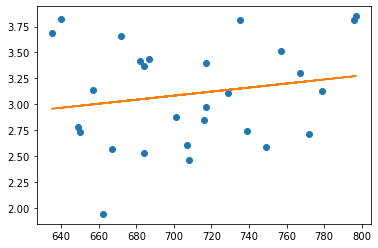

In [24]:
import matplotlib.pyplot as plt
x5 = x4[0:,0]
plt.plot(x5, y4,'o')
b1, b0 = np.polyfit(x5, y4, 1)
z1=plt.plot(x5, b1*x5 + b0)
plt.savefig('ЭЕЩ Голч.png',bbox_inches='tight',pad_inches=2)

In [25]:
file=pd.ExcelWriter("Бие даалт 2 final.xlsx", engine='xlsxwriter')
medeelel1.to_excel(file,
             sheet_name='Оюутнуудын нэмэлт мэдээлэл') 
niit3.to_excel(file,
             sheet_name='Нийт') 
y10_pred.to_excel(file,
             sheet_name='Оюутнуудын нэмэлт мэдээлэл',startcol=13,startrow=2) 
mergejil.to_excel(file,
             sheet_name='Оюутнуудын нэмэлт мэдээлэл',startcol=16,startrow=2) 

file.save()